## Data Description

Context
Party elites use endorsements to influence not only voters but also each other, hoping to get other powerful party members to rally behind the candidate they think would be most acceptable. The pace of endorsements — whether leaders coalesce early around a single candidate or are backing a variety of candidates — can indicate how drawn out the primary season will be. A lack of a consensus can mean that party leaders’ first-choice candidate may have more trouble securing the nomination.

Content
Endorsements to 2020 democratic candidates. Scoring rubric:

10 points: • Former presidents and vice presidents • Current national party leaders

8 points • Governors

6 points U.S. senators

5 points • Former presidential and vice-presidential nominees • Former national party leaders • 2020 presidential candidates who have dropped out

3 points • U.S. representatives • Mayors of large cities

2 points • Officials in statewide elected offices • State legislative leaders

1 point • Other Democratic National Committee members

Acknowledgements
Dataset: https://projects.fivethirtyeight.com/2020-endorsements/democratic-primary/

Article: https://fivethirtyeight.com/features/were-tracking-2020-presidential-endorsements-heres-why-they-probably-still-matter/

Inspiration
Who is more likely to win the 2020 primary?

## Objective
We will clean the original dataset and try to find is there any correlation between the endorsee and the endorser.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('endorsements-2020.csv')
print(df.head())

         date        position         city state          endorser  \
0  2017-07-28  representative          NaN    MD       David Trone   
1  2019-01-02        governor          NaN    NY      Andrew Cuomo   
2  2019-01-03         senator          NaN    CA  Dianne Feinstein   
3  2019-01-08         senator          NaN    DE  Thomas R. Carper   
4  2019-01-12           mayor  San Antonio    TX     Ron Nirenberg   

        endorsee endorser party  \
0   John Delaney              D   
1      Joe Biden              D   
2      Joe Biden              D   
3      Joe Biden              D   
4  Julian Castro            NaN   

                                              source  order         category  \
0  https://twitter.com/davidjtrone/status/8909859...    NaN  Representatives   
1  https://www.cnn.com/2019/01/02/politics/cuomo-...    NaN        Governors   
2  https://www.politico.com/story/2019/01/03/dian...    NaN         Senators   
3  https://fox61.com/2019/01/08/will-he-or-wont-

## Data preprocessing

In [3]:
# view the type in each column
print(df.dtypes)

date               object
position           object
city               object
state              object
endorser           object
endorsee           object
endorser party     object
source             object
order             float64
category           object
body               object
district          float64
points              int64
dtype: object


In [4]:
# view the total missing values
print(df.isnull().sum())

date              757
position            0
city              959
state               0
endorser            0
endorsee          757
endorser party      7
source            757
order             850
category            0
body              901
district          775
points              0
dtype: int64


In [5]:
# drop all the rows containing missing value in the endorser party column and the endorsee column
print(f'Shape before dropped: {df.shape}')
df_dropped = df.dropna(subset=['endorsee','endorser party'], axis=0)
print(f'Shape after row dropped: {df_dropped.shape}')

Shape before dropped: (1006, 13)
Shape after row dropped: (247, 13)


In [6]:
# drop the rest of all the columns that contain missing value and source column
df_dropped = df_dropped.dropna(axis=1).drop('source', axis=1)
print(f'Shape after col dropped: {df_dropped.shape}')

Shape after col dropped: (247, 8)


In [7]:
# review the total missing values
print(df_dropped.isnull().sum())

date              0
position          0
state             0
endorser          0
endorsee          0
endorser party    0
category          0
points            0
dtype: int64


In [8]:
# who gets the most endorsement?
most_endorsed = df_dropped['endorsee'].value_counts().sort_values(ascending=False)
print(most_endorsed)

Joe Biden             81
Elizabeth Warren      33
Bernie Sanders        27
Kamala Harris         24
Cory Booker           21
Michael Bloomberg     17
Pete Buttigieg        14
Amy Klobuchar         14
Michael Bennet         4
Jay Inslee             4
John Delaney           2
Steve Bullock          2
Beto O'Rourke          1
Julian Castro          1
Kirsten Gillibrand     1
Tom Steyer             1
Name: endorsee, dtype: int64


Text(0.5, 1.0, 'number of endorsement each candidate gets')

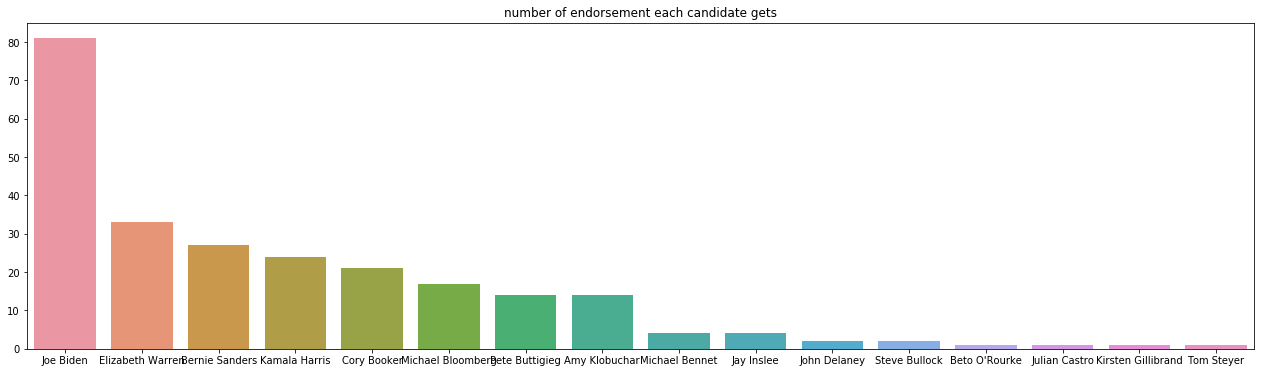

In [9]:
%matplotlib inline
plt.figure(figsize=(22,6))
sns.barplot(most_endorsed.index, most_endorsed.values)
plt.title('number of endorsement each candidate gets')

Joe Biden gets the majority of endorsement followed by Elizabeth Warren at second and Bernie Sanders at third

In [10]:
# which endorsee scored the highest?
grouped = df_dropped[['endorsee', 'points']].groupby('endorsee').sum().sort_values(['points'],ascending=False)[:10]
print(grouped)
print(type(grouped))

                   points
endorsee                 
Joe Biden             252
Elizabeth Warren       87
Kamala Harris          66
Bernie Sanders         55
Cory Booker            54
Amy Klobuchar          53
Michael Bloomberg      47
Pete Buttigieg         36
Michael Bennet         15
Jay Inslee             11
<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Top 10 candidate that scored the highest point')

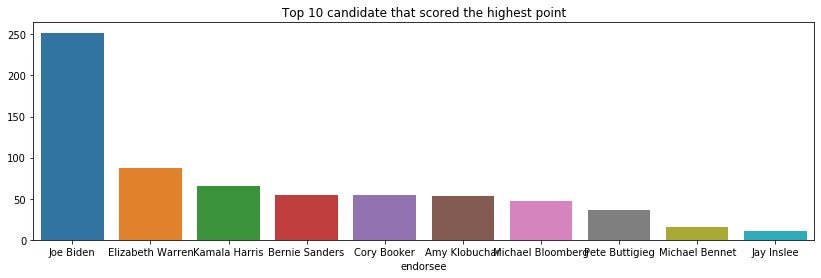

In [11]:
plt.figure(figsize=(14,4))
sns.barplot(grouped.index, grouped.values.reshape(-1))
plt.title('Top 10 candidate that scored the highest point')

Joe Biden scored 252 points in first place followed by Elizabeth Warren with 87 points and Kamala Harris with 66 points

In [12]:
# is there any republican endorsed a democratic candidate?
party_counts = df_dropped['endorser party'].value_counts()
print(party_counts)
repub = df_dropped[df_dropped['endorser party'] == 'R']
# view rows that contain republicans
print(repub)

D    246
R      1
Name: endorser party, dtype: int64
          date        position state       endorser     endorsee  \
50  2019-02-21  representative    NJ  Jeff Van Drew  Cory Booker   

   endorser party         category  points  
50              R  Representatives       3  


There's only one republican who had endorse a democratic candidate. 

In [29]:
# view the correlation between the endorsee and the endorser's state as well as their status
group_by_endorsee = df_dropped[['state', 'endorsee', 'category']].groupby('endorsee')
print(group_by_endorsee['state'].value_counts().sort_values(ascending=False)[:10])
print(group_by_endorsee['category'].value_counts().sort_values(ascending=False)[:10])

endorsee           state
Cory Booker        NJ       19
Kamala Harris      CA       14
Amy Klobuchar      MN       13
Joe Biden          CA       12
Elizabeth Warren   MA       10
Bernie Sanders     VT        8
Michael Bloomberg  CA        7
Joe Biden          PA        7
                   TX        5
                   FL        5
Name: state, dtype: int64
endorsee           category               
Joe Biden          Representatives            40
Kamala Harris      Representatives            13
Elizabeth Warren   Representatives            12
Bernie Sanders     DNC members                11
Joe Biden          DNC members                11
Cory Booker        Representatives             9
Bernie Sanders     Representatives             7
Cory Booker        DNC members                 7
Elizabeth Warren   Statewide officeholders     7
Michael Bloomberg  Representatives             6
Name: category, dtype: int64


Interestingly only Cory Booker, Kamala Harris, and Amy Klobuchar had shown significant hometown advantage. Also we discovered most of the endorsers are demographic representatives.  